In [21]:
import pandas as pd
import numpy as np
import torch
import seaborn as sns
import matplotlib.pyplot as plt

Matplotlib created a temporary cache directory at /scratch_local/esx208-1103458/tmp/matplotlib-cotmtrpb because the default path (/scratch_local/eickhoff/esx208/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.
Fontconfig error: Cannot load default config file: No such file: (null)
Fontconfig error: No writable cache directories
Fontconfig error: No writable cache directories
Fontconfig error: No writable cache directories
Fontconfig error: No writable cache directories
Fontconfig error: No writable cache directories
Fontconfig error: No writable cache directories
Fontconfig error: No writable cache directories


In [4]:
head_patching_results = torch.load('/mnt/qb/work/eickhoff/esx208/axiomatic-ir/results/patching_results_tfc1_batched/append/head_all.pkl')
scores = pd.read_csv('/mnt/qb/work/eickhoff/esx208/axiomatic-ir/data/tfc1/tfc1_add_append_target_qids_scores.csv')

/scratch_local/esx208-1103458/tmp/ipykernel_611493/736669015.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  head_patching_results = torch.load('/mnt/qb/work/eickhoff/es

In [37]:
head_patching_results_list = []
original_scores = []
perturbed_scores = []
for idx, line in scores.iterrows():
    patching_results = head_patching_results[str(int(line['qid']))][str(int(line['doc_id']))]
    if not np.isnan(patching_results).any():
        original_scores.append(line['og_score'])
        perturbed_scores.append(line['p_score'])
        head_patching_results_list.append(patching_results)

original_scores = np.array(original_scores)
perturbed_scores = np.array(perturbed_scores)
head_patching_results_list = np.array(head_patching_results_list)
head_patching_results_unnormalised = head_patching_results_list * (perturbed_scores - original_scores)[:, None, None]
head_patching_results = head_patching_results_unnormalised / np.abs(perturbed_scores - original_scores)[:, None, None]
head_patching_results_penalty_square = head_patching_results_unnormalised / np.sqrt(1 + (perturbed_scores - original_scores)**2)[:, None, None]

mean_magnitude = np.mean(np.abs(head_patching_results_list), axis=(-1,-2))
variance = np.var(head_patching_results_list, axis=(-1,-2))

mean_magnitude_penalty_square = np.mean(np.abs(head_patching_results_penalty_square), axis=(-1,-2))
variance_penalty_square = np.var(head_patching_results_penalty_square, axis=(-1,-2))

<Axes: >

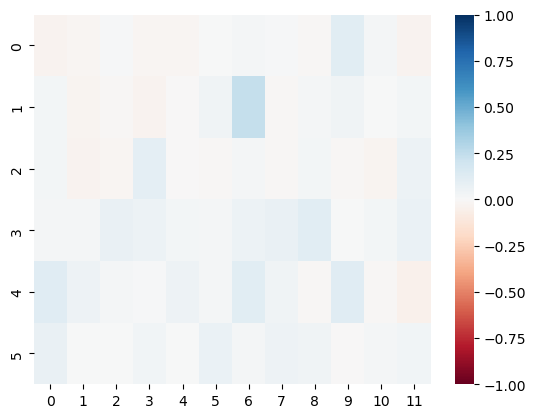

In [41]:
sns.heatmap(
    np.mean(np.array(head_patching_results), axis=0),
    vmax=1,
    vmin=-1,
    cmap='RdBu'
)

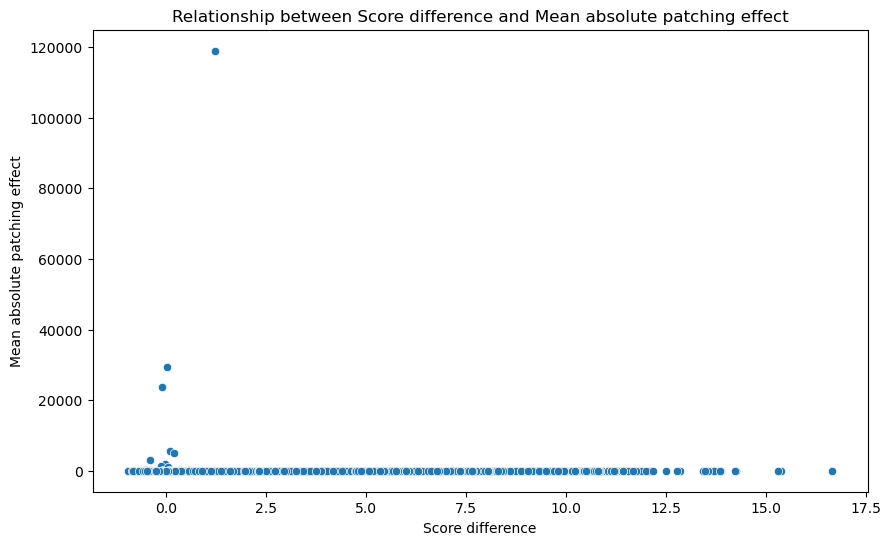

In [44]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=perturbed_scores - original_scores, y=variance)
plt.xlabel('Score difference')
plt.ylabel('Mean absolute patching effect')
plt.title(f'Relationship between Score difference and Mean absolute patching effect')
plt.show()

<Axes: >

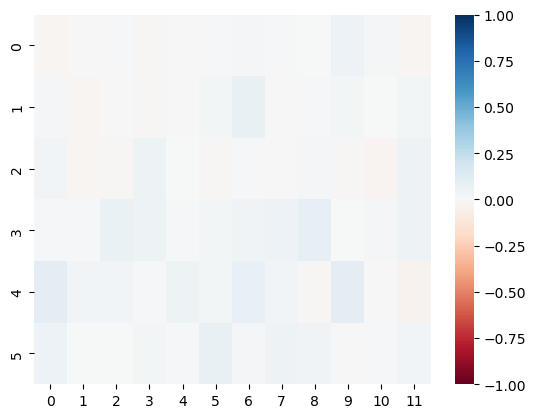

In [42]:
sns.heatmap(
    np.mean(np.array(head_patching_results_penalty_square), axis=0),
    vmax=1,
    vmin=-1,
    cmap='RdBu'
)

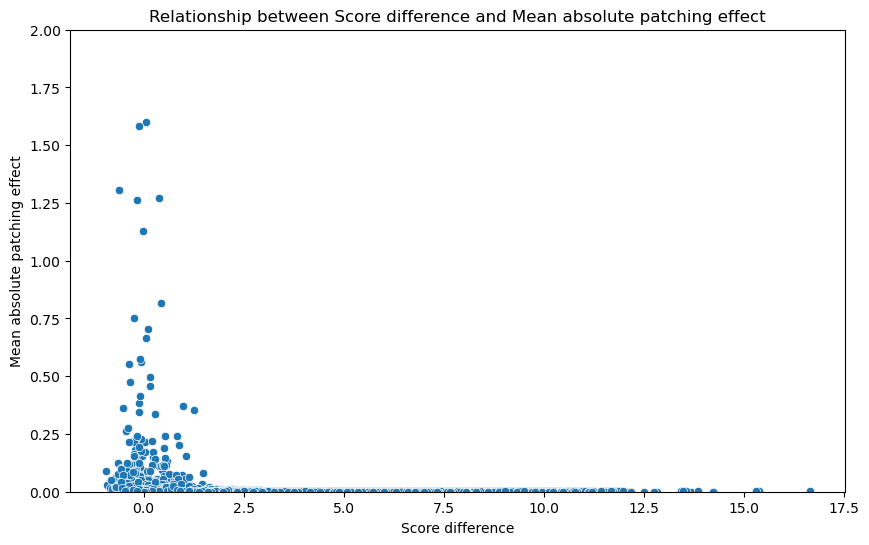

In [49]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=perturbed_scores - original_scores, y=variance_penalty_square)
plt.ylim(0, 2)
plt.xlabel('Score difference')
plt.ylabel('Mean absolute patching effect')
plt.title(f'Relationship between Score difference and Mean absolute patching effect')
plt.show()